In [1]:
import requests
from IPython.core.display import HTML

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
cus_train_df = pd.read_csv('train.csv')
cus_train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# `Exploratory Data Analysis`


-    [1 - Check The Dataframe for NULL values](#first-bullet)
-    [2 - Check The Distribution of `Target` Variable](#second-bullet)
-    [3 - Check for Outliers](#third-bullet)

In [4]:
print(f"The Training DataFrame has {cus_train_df.shape[0]} rows and {cus_train_df.shape[1]} columns ")

The Training DataFrame has 76020 rows and 371 columns 


<a class="anchor" id="first-bullet"></a>
### 1 -  Checking for NULL values

In [5]:
# For train set
for col in cus_train_df.columns:
    if cus_train_df[col].isnull().sum()!=0:
        print(col, cus_train_df[col].isnull().sum())

**We didn't find any column consisting NULL values**

<a class="anchor" id="second-bullet"></a>
### 2 -  Check the distribution of the target variable 

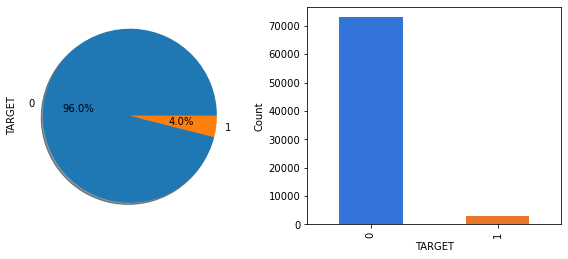

In [6]:
# Drwa pie chart and bar plots to check the ditribution of the response(TARGET) variable
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
cus_train_df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%',
                                                   ax=ax[0], shadow=True)
ax[1] = cus_train_df['TARGET'].value_counts().plot.bar(color = ['#3274D7', '#E87529'])
ax[1].set_xlabel("TARGET")
ax[1].set_ylabel("Count")
plt.show()

**Clearly there is too much difference in between the two classes for the <font color='green'>TARGET</font> variable. So, in order to tackle this we would have to upsample the dataframe.** 

<a class="anchor" id="third-bullet"></a>
### 3 -  Check for Outliers

In [7]:
cus_train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
# Checking for minimum values for different columns 
described_df = cus_train_df.describe()
# Printing top 5 least values in different columns
np.sort(described_df.loc['min'])[0:5]

array([-999999.  ,   -4942.26,   -4942.26,   -4942.26,   -3401.34])

In [9]:
# Check the values of standard deviation
described_df.loc['std']

ID                          43781.947379
var3                        39033.462364
var15                          12.956486
imp_ent_var16_ult1           1614.757313
imp_op_var39_comer_ult1       339.315831
                               ...      
saldo_medio_var44_hace3       147.786584
saldo_medio_var44_ult1       4040.337842
saldo_medio_var44_ult3       2852.579397
var38                      182664.598503
TARGET                          0.194945
Name: std, Length: 371, dtype: float64

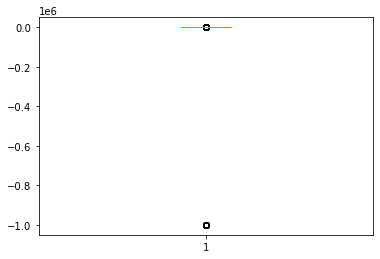

In [10]:
# plot a Boxplot to check the values for var3
plt.boxplot(cus_train_df['var3'])
plt.show()

**Clearly `var3` has outliers as observed from the boxplot, but they actually signify Missing values**

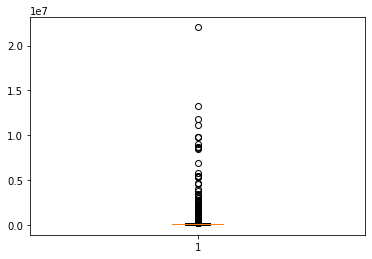

In [11]:
# Check for var38 as it also has high variance
# plot a Boxplot to check the values for var3
plt.boxplot(cus_train_df['var38'])
plt.show()

# `Preprocessing and Feature Enginnering`


-    [1 - Drop Unnecessary columns](#f1-bullet)
    *  [1.1 - Drop Columns with constant values](#f1.1-bullet)
    *  [1.2 - Remove Duplicate Columns from the Dataframe](#f1.2-bullet) 
-    [2 - Handle Ouliers & NAN values](#f2-bullet)  
-    [3 - Define the Predictors and Response variable](#f3-bullet)
-    [4 - Standarization and Splitting](#f4-bullet)
-    [5 - Upsampling](#f5-bullet)

<a class="anchor" id="f1-bullet"></a>
### 1 -  Drop Unncessary columns

In [12]:
# ID column is not needed as it signifies the index
# Drop "ID" column from the data frame
cleaned_train_df = cus_train_df.copy()
cleaned_train_df = cus_train_df.drop(['ID'], axis=1)
cleaned_train_df.tail(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<a class="anchor" id="f1.1-bullet"></a>
#### 1.1 -  Drop Columns with Constant Values

In [13]:
# Variable to store columns with constant value throughout in a dataframe
constant_columns = []
for column in cleaned_train_df.columns:
    #Check if the unique values of the rows in a column is equal to 1 
    if cleaned_train_df[column].nunique()==1:
        constant_columns.append(column)
print(f"The number of columns with constant value is: {len(constant_columns)}")

The number of columns with constant value is: 34


In [14]:
# Drop Constant Valued Columns `stored in constant_columns`
cleaned_train_df = cleaned_train_df.drop(labels=constant_columns, axis=1)
print(f"The cleaned DataFrame without constant columns has {cleaned_train_df.shape[0]} rows and {cleaned_train_df.shape[1]} columns")

The cleaned DataFrame without constant columns has 76020 rows and 336 columns


<a class="anchor" id="f1.2-bullet"></a>
#### 1.2 -  Drop Duplicate Columns

In [15]:
# Check for Duplicate Columns
duplicated_col = cleaned_train_df.columns[cleaned_train_df.T.duplicated()]
print(f"The DataFrame has {len(duplicated_col)} duplicate columns")

The DataFrame has 29 duplicate columns


In [16]:
# Drop Duplicate columns
cleaned_train_df.drop(labels=duplicated_col, axis=1, inplace=True)
print(f"The cleaned DataFrame without duplicate columns has {cleaned_train_df.shape[0]} rows and {cleaned_train_df.shape[1]} columns")

The cleaned DataFrame without duplicate columns has 76020 rows and 307 columns


#### 1.3 Drop columns with very less Variance

In [124]:
df_clean = cleaned_train_df.copy()
# print(df_clean.shape)
# Investigating for semi-constant features in the Dataframe

# Removing all features that have variance under 0.01
select_var = VarianceThreshold(threshold = 0.01)
select_var.fit(df_clean)
mask_clean = select_var.get_support()
df_clean = df_clean[df_clean.columns[mask_clean]]

# Cheking if we realy removed something
print(f"The number of columns with very less variance is {(len(cleaned_train_df.columns) - 1) - df_clean.shape[1]}")
print(f"The cleaned DataFrame without duplicate columns has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns")

The number of columns with very less variance is 50
The cleaned DataFrame without duplicate columns has 76020 rows and 256 columns


<a class="anchor" id="f2-bullet"></a>
#### 2 -  Handle Outliers and NAN values

In [21]:
# Here in var3 there are 108 values with -999999.0 values
# They can be treated as Missing Values
## Replace them by mean of the column
# cleaned_train_df['var3'].replace(-999999.,np.mean(cleaned_train_df['var3']),inplace=True)
df_clean['var3'].replace(-999999., 2,inplace=True)


# Take a look at the dataframe
df_clean.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


<a class="anchor" id="f3-bullet"></a>
### 3 -  Define the Predictor and Response Variable

In [23]:

X = df_clean.drop(['TARGET'], axis=1)
y = df_clean['TARGET']

<a class="anchor" id="f4-bullet"></a>
### 4 - Standarization and Splitting

In [24]:
# Standarize the Data 
scaler = StandardScaler().fit(X)
X_scaler = scaler.transform(X)
X_scaler_df = pd.DataFrame(X_scaler, columns=X.columns)


In [79]:
# Split the unstandarised data 
# X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8,stratify=y, random_state=42)

In [28]:
# Split the standarised Dataframe
scaler_X_train, scaler_X_test, scaler_y_train, scaler_y_test = train_test_split(X_scaler, y, test_size=0.2,
                                                                                stratify=y, random_state=42)
                                                                               

<a class="anchor" id="f5-bullet"></a>
### 5 - Upsampling

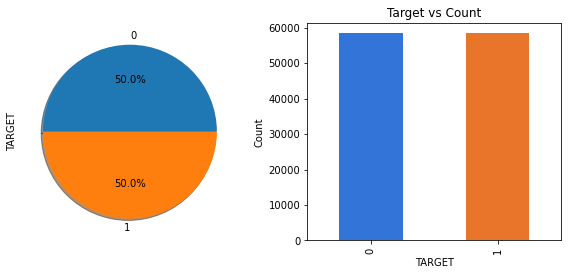

In [31]:
smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(scaler_X_train,scaler_y_train)

# Pie & Bar plots after upsampling 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
y_oversampled.value_counts().plot.pie(autopct='%1.1f%%',
                                                   ax=ax[0], shadow=True)
ax[1] = y_oversampled.value_counts().plot(kind='bar',title='Target vs Count',color=['#3274D7', '#E87529'])
ax[1].set_xlabel("TARGET")
ax[1].set_ylabel("Count")
plt.show()

# `Model Selection`

In [ ]:
# Helper functions to visualise and see reults

In [32]:
# Helper function to visualise confusion Matric
def print_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.9)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [89]:
# Helper function to interpret results of a model
def get_clf_eval(y_test, y_pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
#     print('\033[1m\t\tConfusion Matrix')
    print_confusion_matrix(confusion)
    print('\nThe Accuacy of the model is: {}%'.format(np.around(accuracy,2)*100))
    print('The Precision is : {}'.format(np.around(precision,4)))
    print('The Recall is : {}'.format(np.around(recall,4)))
    print('The F1 score is : {}'.format(np.around(f1,4)))  
    print('ROC_AUC is : {}\n'.format(np.around(roc_auc,4)))
    print(classification_report(y_test, y_pred))
    return round(f1, 4), round(roc_auc, 4), round(accuracy, 4)

## Logistic Regression with Class imbalance (Baseline Model)

In [82]:
# Define the model
lg_imb_model = LogisticRegression(random_state=86)

In [84]:
%%time

lg_imb_model.fit(scaler_X_train, scaler_y_train)
y_pred_lg_imb = lg_imb_model.predict(scaler_X_test)
y_pred_proba_lg_imb = lg_imb_model.predict_proba(scaler_X_test)[:,1]

CPU times: user 4.25 s, sys: 42.8 ms, total: 4.29 s
Wall time: 2.32 s


/Users/jatinkumar/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


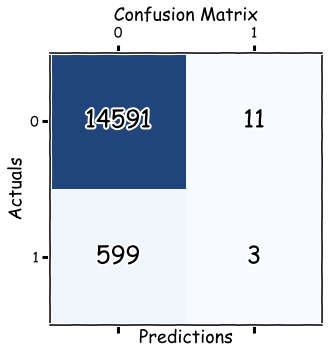


The Accuacy of the model is: 96.0%
The Precision is : 0.2143
The Recall is : 0.005
The F1 score is : 0.0097
ROC_AUC is : 0.8035

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14602
           1       0.21      0.00      0.01       602

    accuracy                           0.96     15204
   macro avg       0.59      0.50      0.49     15204
weighted avg       0.93      0.96      0.94     15204



In [90]:
f1_lg_imb, roc_lg_imb, accuracy_lg_imb = get_clf_eval(scaler_y_test, y_pred_lg_imb, y_pred_proba_lg_imb)

***Clearly we can see that the model is biased towards a particular class and hence the f1 score is very low.***

## Logistic Regression using Upsampled Data

In [115]:
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Hyper parameter tuning for Logistic regression 

lreg_model = GridSearchCV(estimator=LogisticRegression(max_iter=20000), param_grid=c_values)
lreg_model.fit(scaler_X_train, scaler_y_train)
y_pred_logistic = lreg_model.predict(scaler_X_test)

In [116]:
lreg_model.best_params_

{'C': 0.0001}

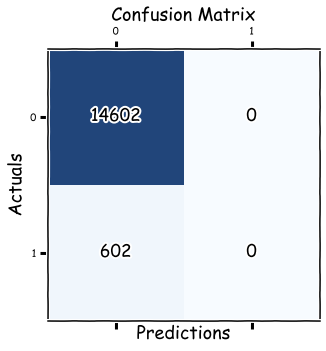


The Accuacy of the model is: 96.0%
The Precision is : 0.0
The Recall is : 0.0
The F1 score is : 0.0
ROC_AUC is : 0.7882

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14602
           1       0.00      0.00      0.00       602

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



In [119]:
y_pred_proba_logistic = lreg_model.predict_proba(scaler_X_test)[:,1]
f1_lreg, roc_auc_lreg, accuracy_lreg = get_clf_eval(scaler_y_test, y_pred_logistic, y_pred_proba_logistic)

In [120]:
log_reg_model = LogisticRegression(random_state=86,
                                   C=0.0001 
                                   ,max_iter=20000)

In [121]:
%%time

log_reg_model.fit(X_oversampled, y_oversampled)
y_pred_lr = log_reg_model.predict(scaler_X_test)
y_pred_proba_lr = log_reg_model.predict_proba(scaler_X_test)[:,1]

CPU times: user 2.23 s, sys: 173 ms, total: 2.41 s
Wall time: 1.44 s


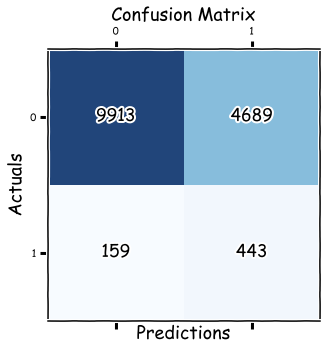


The Accuacy of the model is: 68.0%
The Precision is : 0.0863
The Recall is : 0.7359
The F1 score is : 0.1545
ROC_AUC is : 0.801

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     14602
           1       0.09      0.74      0.15       602

    accuracy                           0.68     15204
   macro avg       0.54      0.71      0.48     15204
weighted avg       0.95      0.68      0.78     15204



In [122]:
f1_lr, roc_auc_lr, accuracy_lr = get_clf_eval(scaler_y_test, y_pred_lr, y_pred_proba_lr)

In [112]:
# # Calculate FPR and TPR for all thresholds
# fpr, tpr, threshold = roc_curve(scaler_y_test, y_pred_proba_lr)
# roc_auc = auc(fpr, tpr)

# # Plotting the ROC curve
# fig, ax = plt.subplots(figsize = (7, 5))
# plt.title('Receiver Operating Characteristic', fontsize=18)
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.legend(loc = 'upper left', fontsize = 16)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate', fontsize = 16)
# plt.xlabel('False Positive Rate', fontsize = 16)
# plt.show()

## Random Forest

In [74]:
rf_model = RandomForestClassifier(random_state=86,
                                 max_depth=10,
                                 warm_start=True,
                                 n_estimators=300,
                                 )

In [75]:
%%time
rf_model.fit(X_oversampled, y_oversampled)
y_pred_rf = rf_model.predict(scaler_X_test)
y_pred_proba_rf = rf_model.predict_proba(scaler_X_test)[:,1]
# get_clf_eval(scaler_y_test, y_pred_rf, y_pred_proba_rf)

# print(rc_result)

CPU times: user 1min 38s, sys: 946 ms, total: 1min 39s
Wall time: 1min 41s


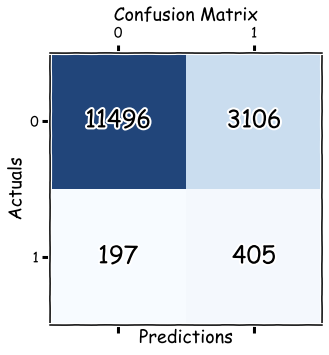


The Accuacy of the model is: 78.0%
The Precision is : 0.1154
The Recall is : 0.6728
The F1 score is : 0.1969
ROC_AUC is : 0.8183

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     14602
           1       0.12      0.67      0.20       602

    accuracy                           0.78     15204
   macro avg       0.55      0.73      0.54     15204
weighted avg       0.95      0.78      0.85     15204



In [92]:
f1_rf, roc_auc_rf, accuracy_rf = get_clf_eval(scaler_y_test, y_pred_rf, y_pred_proba_rf)

## XG-Boost 

/Users/jatinkumar/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:32:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


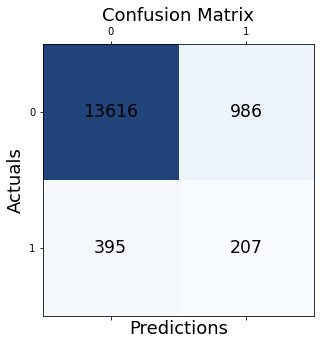


The Accuacy of the model is: 91.0%
The Precision is : 0.1735
The Recall is : 0.3439
The F1 score is : 0.2306
ROC_AUC is : 0.81

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     14602
           1       0.17      0.34      0.23       602

    accuracy                           0.91     15204
   macro avg       0.57      0.64      0.59     15204
weighted avg       0.94      0.91      0.92     15204

CPU times: user 55min 24s, sys: 34.2 s, total: 55min 58s
Wall time: 23min 14s


In [41]:
%%time
xg_model = xgb.XGBClassifier(missing=np.nan, max_depth=15, n_estimators=350, learning_rate=0.03,
                             nthread=4, subsample=0.95, colsample_bytree=0.85, seed=4242)

xg_model.fit(X_oversampled, y_oversampled)
y_pred_xg = xg_model.predict(scaler_X_test)
y_pred_proba_xg = xg_model.predict_proba(scaler_X_test)[:,1]

# get_clf_eval(scaler_y_test, y_pred_xg, y_pred_proba_xg)



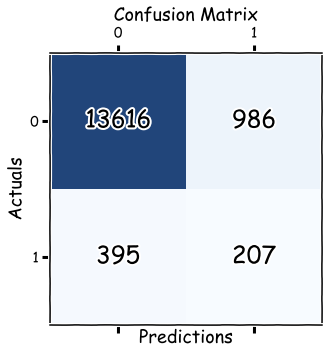


The Accuacy of the model is: 91.0%
The Precision is : 0.1735
The Recall is : 0.3439
The F1 score is : 0.2306
ROC_AUC is : 0.81

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     14602
           1       0.17      0.34      0.23       602

    accuracy                           0.91     15204
   macro avg       0.57      0.64      0.59     15204
weighted avg       0.94      0.91      0.92     15204



In [93]:
f1_xgb, roc_auc_xgb, accuracy_xgb = get_clf_eval(scaler_y_test, y_pred_xg, y_pred_proba_xg)

## AdaBoost

In [127]:
%%time
ada_boost_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), 
                            algorithm = 'SAMME', n_estimators=9)

# Fit on the entire data
ada_boost_model.fit(X_oversampled, y_oversampled)
y_pred_ada = ada_boost_model.predict(scaler_X_test)
y_pred_proba_ada = ada_boost_model.predict_proba(scaler_X_test)[:,1]

CPU times: user 11.2 s, sys: 717 ms, total: 11.9 s
Wall time: 13.4 s


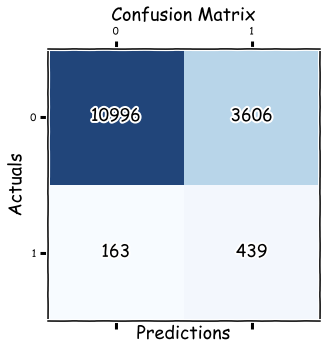


The Accuacy of the model is: 75.0%
The Precision is : 0.1085
The Recall is : 0.7292
The F1 score is : 0.1889
ROC_AUC is : 0.8065

              precision    recall  f1-score   support

           0       0.99      0.75      0.85     14602
           1       0.11      0.73      0.19       602

    accuracy                           0.75     15204
   macro avg       0.55      0.74      0.52     15204
weighted avg       0.95      0.75      0.83     15204



In [128]:
f1_ada, roc_auc_ada, accuracy_ada = get_clf_eval(scaler_y_test, y_pred_ada, y_pred_proba_ada)

# Comparing the models

In [129]:
# Compile the results from the implementations above

pt = PrettyTable()
pt.field_names = ["Models and Startegy","F1 Score","AUC score","Accuracy"]
pt.add_row(["Logistic Regression - No imbalance correction",f1_lg_imb, roc_lg_imb, accuracy_lg_imb])
pt.add_row(["Tuned Logistic Regression - Using Upsampled Data",f1_lr, roc_auc_lr, accuracy_lr])
pt.add_row(["Tuned Random Forest - Using Upsampled Data",f1_rf, roc_auc_rf, accuracy_rf])
pt.add_row(["Tuned ADA-Boost - Using Upsampled Data",f1_ada, roc_auc_ada, accuracy_ada])
pt.add_row(["Tuned XG-Boost - Using Upsampled Data",f1_xgb, roc_auc_xgb, accuracy_xgb])
print(pt)

+--------------------------------------------------+----------+-----------+----------+
|               Models and Startegy                | F1 Score | AUC score | Accuracy |
+--------------------------------------------------+----------+-----------+----------+
|  Logistic Regression - No imbalance correction   |  0.0097  |   0.8035  |  0.9599  |
| Tuned Logistic Regression - Using Upsampled Data |  0.1545  |   0.801   |  0.6811  |
|    Tuned Random Forest - Using Upsampled Data    |  0.1969  |   0.8183  |  0.7828  |
|      Tuned ADA-Boost - Using Upsampled Data      |  0.1889  |   0.8065  |  0.7521  |
|      Tuned XG-Boost - Using Upsampled Data       |  0.2306  |    0.81   |  0.9092  |
+--------------------------------------------------+----------+-----------+----------+


In [132]:
# helper function for ROC_CURVE 

def plot_roc(y_test,lg_ibm_probs, lr_probs,rf_probs,xg_probs,ada_probs, axis):
    lg_ibm_fpr, lg_ibm_tpr, lg_ibm_thresholds = roc_curve(y_test, lg_ibm_probs)
    lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
    xg_fpr, xg_tpr, xg_thresholds = roc_curve(y_test, xg_probs)
    ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada_probs)
    
    ax.plot(lg_ibm_fpr, lg_ibm_tpr, label=f'Logistic Reg (with class imbalance) (area = {roc_lg_imb:.2f})', 
                                                                    alpha=0.5, color = 'purple')  
    ax.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (area = {roc_auc_lr:.2f})',alpha=0.5, color = 'b')
    ax.plot(rf_fpr, rf_tpr, label=f'Random Forest (area = {roc_auc_rf:.2f})',alpha=0.5, color = 'g')  
    ax.plot(xg_fpr, xg_tpr, label=f'XG-Boost (area = {roc_auc_xgb:.2f})',alpha=0.5, color = 'k')  
    ax.plot(ada_fpr, ada_tpr, label=f'Ada-Boost (area = {roc_auc_ada:.2f})',alpha=0.5, color = 'brown')  
    
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.4,
    )
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    ax.legend(loc="lower right")


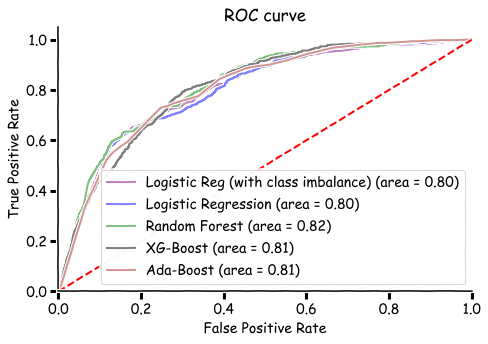

In [133]:
#ROC Curve values
# plt.style.use('seaborn-white')
plt.xkcd(randomness=0,scale=0.1)
fig, ax = plt.subplots(nrows=2, ncols=2,figsize = (7,5))
fig.patch.set_facecolor('None')
fig.patch.set_alpha(0)
plot_roc(scaler_y_test,y_pred_proba_lg_imb,y_pred_proba_lr,y_pred_proba_rf, y_pred_proba_xg,y_pred_proba_ada,ax)
[ax.spines[key].set_visible(False) for key in ax.spines.keys() if key not in ['bottom','left']];
ax.patch.set_facecolor('None')
ax.patch.set_alpha(0)
plt.tight_layout()
